<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>

# Neural Network Framework (Keras)

## *Data Science Unit 4 Sprint 2 Assignment 3*

## Use the Keras Library to build a Multi-Layer Perceptron Model on the Boston Housing dataset

- The Boston Housing dataset comes with the Keras library so use Keras to import it into your notebook. 
- Normalize the data (all features should have roughly the same scale)
- Import the type of model and layers that you will need from Keras.
- Instantiate a model object and use `model.add()` to add layers to your model
- Since this is a regression model you will have a single output node in the final layer.
- Use activation functions that are appropriate for this task
- Compile your model
- Fit your model and report its accuracy in terms of Mean Squared Error
- Use the history object that is returned from model.fit to make graphs of the model's loss or train/validation accuracies by epoch. 
- Run this same data through a linear regression model. Which achieves higher accuracy?
- Do a little bit of feature engineering and see how that affects your neural network model. (you will need to change your model to accept more inputs)
- After feature engineering, which model sees a greater accuracy boost due to the new features?

In [ ]:
#%tensorflow_version 2.x

#import Boston dataset
from tensorflow.keras.datasets import boston_housing

#load data
(X_train, y_train), (X_test, y_test) = boston_housing.load_data()

print('X_train shape:', X_train.shape)
print('y_train shape:', y_train.shape)

In [3]:
X_train

array([[1.23247e+00, 0.00000e+00, 8.14000e+00, ..., 2.10000e+01,
        3.96900e+02, 1.87200e+01],
       [2.17700e-02, 8.25000e+01, 2.03000e+00, ..., 1.47000e+01,
        3.95380e+02, 3.11000e+00],
       [4.89822e+00, 0.00000e+00, 1.81000e+01, ..., 2.02000e+01,
        3.75520e+02, 3.26000e+00],
       ...,
       [3.46600e-02, 3.50000e+01, 6.06000e+00, ..., 1.69000e+01,
        3.62250e+02, 7.83000e+00],
       [2.14918e+00, 0.00000e+00, 1.95800e+01, ..., 1.47000e+01,
        2.61950e+02, 1.57900e+01],
       [1.43900e-02, 6.00000e+01, 2.93000e+00, ..., 1.56000e+01,
        3.76700e+02, 4.38000e+00]])

In [4]:
#Normalize data
from sklearn import preprocessing
X_train = preprocessing.normalize(X_train)
X_test = preprocessing.normalize(X_test)


In [6]:
#import keras stuff
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

import numpy as np
np.random.seed(42)

In [10]:
#instantiate a model object

from tensorflow.keras.callbacks import History
history = History()

model = Sequential()
model.add(Dense(64, input_dim=13, activation = 'relu'))
model.add(Dense(64, activation = 'relu'))
model.add(Dense(1, activation='linear'))

#compile model
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mse', 'mae'])

#fit model
model.fit(X_train, y_train, epochs=500, callbacks=[history])

Train on 404 samples
Epoch 1/500
404/404 [==============================] - 0s 787us/sample - loss: 575.8377 - mse: 575.8377 - mae: 22.1602
Epoch 2/500
404/404 [==============================] - 0s 59us/sample - loss: 554.8245 - mse: 554.8245 - mae: 21.6775
Epoch 3/500
404/404 [==============================] - 0s 57us/sample - loss: 527.2538 - mse: 527.2538 - mae: 21.0319
Epoch 4/500
404/404 [==============================] - 0s 59us/sample - loss: 486.3163 - mse: 486.3163 - mae: 20.0384
Epoch 5/500
404/404 [==============================] - 0s 52us/sample - loss: 429.0952 - mse: 429.0952 - mae: 18.5515
Epoch 6/500
404/404 [==============================] - 0s 57us/sample - loss: 354.6654 - mse: 354.6655 - mae: 16.4212
Epoch 7/500
404/404 [==============================] - 0s 52us/sample - loss: 268.4788 - mse: 268.4788 - mae: 13.6328
Epoch 8/500
404/404 [==============================] - 0s 59us/sample - loss: 184.8199 - mse: 184.8199 - mae: 10.3970
Epoch 9/500
404/404 [=============

In [11]:
print(history.history)

{'loss': [575.837699663521, 554.8244689337098, 527.2538403803759, 486.3163116757232, 429.09520668558554, 354.6654309565478, 268.47875613977413, 184.81990549824025, 123.59155711561147, 91.83984008637985, 85.07237236098487, 83.10690768402402, 81.86001128017313, 80.53815641497621, 79.5021179501373, 78.41843029059986, 77.20959789918201, 76.01989100239065, 74.72836802265432, 73.41142937688544, 72.1839824714283, 71.03378341221574, 70.01415951417225, 68.96303263749226, 67.81100716921362, 66.7129583075495, 65.8509090159199, 64.96597803701269, 64.46700634342609, 63.3927013283909, 63.201293152157625, 62.51572093397084, 61.8340587238274, 61.43140014799515, 60.94947746956702, 60.77309251539778, 60.38070807126489, 59.9757552571816, 59.831329628972725, 59.42808177683613, 59.34761593129375, 58.94323496299215, 58.84563147667611, 58.47360864016089, 58.42038062067315, 58.17893955495098, 57.96552125534209, 57.84356039821512, 57.722615478062394, 57.49509539462552, 57.4682417576856, 57.210439474275795, 57.

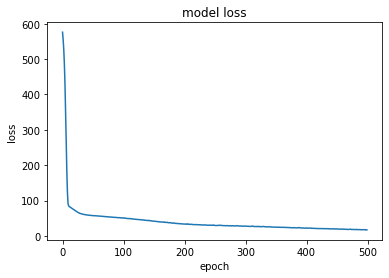

In [12]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()

In [14]:
#linear regression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

model = LinearRegression()

#fit model
model.fit(X_train, y_train)
y_pred = model.predict(X_train)
mse = mean_squared_error(y_train, y_pred)
print('Train error:', mse)

Train error: 22.77423909605731


In [16]:
#feature engineering
import pandas as pd

#set col names
column_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 
                'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']

#create dataframe
X_train_df = pd.DataFrame(X_train, columns = column_names)
X_test_df = pd.DataFrame(X_test, columns = column_names)

In [17]:
# Keep only 'RM', 'LSTAT', and 'PTRATIO'
X_train_df = X_train_df[['RM', 'LSTAT', 'PTRATIO']]
X_test_df = X_test_df[['RM', 'LSTAT', 'PTRATIO']]

In [18]:
# Run the NN with the new features
history = History()

model = Sequential()
model.add(Dense(64, input_dim=3, activation="relu"))
model.add(Dense(64, activation="relu"))
model.add(Dense(1, activation="linear"))

# Compile the model
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mse','mae'])

# Fit the model and report its accuracy in terms of Mean Squared Error
model.fit(X_train_df, y_train, epochs=500, callbacks=[history])

Train on 404 samples
Epoch 1/500
404/404 [==============================] - 0s 886us/sample - loss: 583.9371 - mse: 583.9370 - mae: 22.3433
Epoch 2/500
404/404 [==============================] - 0s 54us/sample - loss: 577.6990 - mse: 577.6990 - mae: 22.2044
Epoch 3/500
404/404 [==============================] - 0s 57us/sample - loss: 568.1962 - mse: 568.1962 - mae: 21.9877
Epoch 4/500
404/404 [==============================] - 0s 54us/sample - loss: 553.9479 - mse: 553.9479 - mae: 21.6565
Epoch 5/500
404/404 [==============================] - 0s 50us/sample - loss: 533.1921 - mse: 533.1921 - mae: 21.1712
Epoch 6/500
404/404 [==============================] - 0s 52us/sample - loss: 504.5276 - mse: 504.5276 - mae: 20.4849
Epoch 7/500
404/404 [==============================] - 0s 59us/sample - loss: 467.1629 - mse: 467.1628 - mae: 19.5440
Epoch 8/500
404/404 [==============================] - 0s 52us/sample - loss: 420.4132 - mse: 420.4132 - mae: 18.3085
Epoch 9/500
404/404 [=============

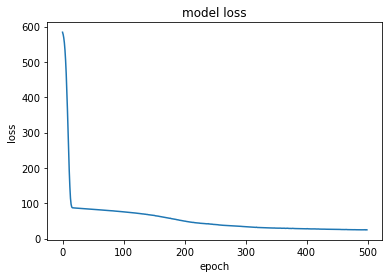

In [19]:
#plot history
plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()

In [20]:
# The new linear model
model = LinearRegression()

# Fit the model
model.fit(X_train_df, y_train)
y_pred = model.predict(X_train_df)
mse = mean_squared_error(y_train, y_pred)
print("Train error:", mse)
y_pred = model.predict(X_test_df)
mse = mean_squared_error(y_test, y_pred)
print("Test error:", mse)

Train error: 28.02315323371724
Test error: 17.618255402222722


## Use the Keras Library to build an image recognition network using the Fashion-MNIST dataset (also comes with keras)

- Load and preprocess the image data similar to how we preprocessed the MNIST data in class.
- Make sure to one-hot encode your category labels
- The number of nodes in your output layer should equal the number of classes you want to predict for Fashion-MNIST.
- Try different hyperparameters. What is the highest accuracy that you are able to achieve.
- Use the history object that is returned from model.fit to make graphs of the model's loss or train/validation accuracies by epoch. 
- Remember that neural networks fall prey to randomness so you may need to run your model multiple times (or use Cross Validation) in order to tell if a change to a hyperparameter is truly producing better results.

In [21]:
# Imports
from tensorflow import keras
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import numpy as np
np.random.seed(42)

In [22]:
#load the data
(X_train, y_train), (X_test, y_test)=mnist.load_data()

In [23]:
#set variable types
X_train = X_train.astype('float32') / 255.
X_test = X_test.astype('float32') / 255.

# Correct encoding on y
num_classes = 10
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

print("X_train shape: ", X_train.shape)
print("y_train shape: ", y_train.shape)

X_train shape:  (60000, 28, 28)
y_train shape:  (60000, 10)


In [24]:
import os
import datetime
import tensorflow as tf

logdir = os.path.join("logs", datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))
tensorboard_callback = tf.keras.callbacks.TensorBoard(logdir, histogram_freq=1)

In [25]:

# The model
from tensorflow.keras.layers import Flatten

model = Sequential([
    Flatten()])
model.add(Dense(250, input_dim=784, activation="relu"))
model.add(Dense(250, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

model.fit(x=X_train, 
        y=y_train, 
        epochs=5, 
        validation_data=(X_test, y_test), 
        callbacks=[tensorboard_callback])

Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 7s 116us/sample - loss: 0.2011 - accuracy: 0.9392 - val_loss: 0.0979 - val_accuracy: 0.9699
Epoch 2/5
60000/60000 [==============================] - 6s 103us/sample - loss: 0.0858 - accuracy: 0.9739 - val_loss: 0.0971 - val_accuracy: 0.9679
Epoch 3/5
60000/60000 [==============================] - 6s 97us/sample - loss: 0.0579 - accuracy: 0.9815 - val_loss: 0.0753 - val_accuracy: 0.9792
Epoch 4/5
60000/60000 [==============================] - 6s 100us/sample - loss: 0.0434 - accuracy: 0.9861 - val_loss: 0.0719 - val_accuracy: 0.9792
Epoch 5/5
60000/60000 [==============================] - 6s 102us/sample - loss: 0.0364 - accuracy: 0.9876 - val_loss: 0.0827 - val_accuracy: 0.9777


In [28]:
# Use only softmax activation function
logdir = os.path.join("logs", datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))
tensorboard_callback = tf.keras.callbacks.TensorBoard(logdir, histogram_freq=1)

model = Sequential([
    Flatten()])
model.add(Dense(250, input_dim=784, activation="softmax"))
model.add(Dense(250, activation='softmax'))
model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

model.fit(x=X_train, 
        y=y_train, 
        epochs=5, 
        validation_data=(X_test, y_test), 
        callbacks=[tensorboard_callback])

Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 7s 123us/sample - loss: 1.7100 - accuracy: 0.4727 - val_loss: 1.0122 - val_accuracy: 0.5831
Epoch 2/5
60000/60000 [==============================] - 7s 114us/sample - loss: 0.8972 - accuracy: 0.5969 - val_loss: 0.8373 - val_accuracy: 0.6177
Epoch 3/5
60000/60000 [==============================] - 7s 113us/sample - loss: 0.7851 - accuracy: 0.6575 - val_loss: 0.7350 - val_accuracy: 0.7154
Epoch 4/5
60000/60000 [==============================] - 7s 115us/sample - loss: 0.6493 - accuracy: 0.7402 - val_loss: 0.5886 - val_accuracy: 0.7593
Epoch 5/5
60000/60000 [==============================] - 7s 115us/sample - loss: 0.5447 - accuracy: 0.7851 - val_loss: 0.5290 - val_accuracy: 0.7889


## Stretch Goals:

- Use Hyperparameter Tuning to make the accuracy of your models as high as possible. (error as low as possible)
- Use Cross Validation techniques to get more consistent results with your model.
- Use GridSearchCV to try different combinations of hyperparameters. 
- Start looking into other types of Keras layers for CNNs and RNNs maybe try and build a CNN model for fashion-MNIST to see how the results compare.